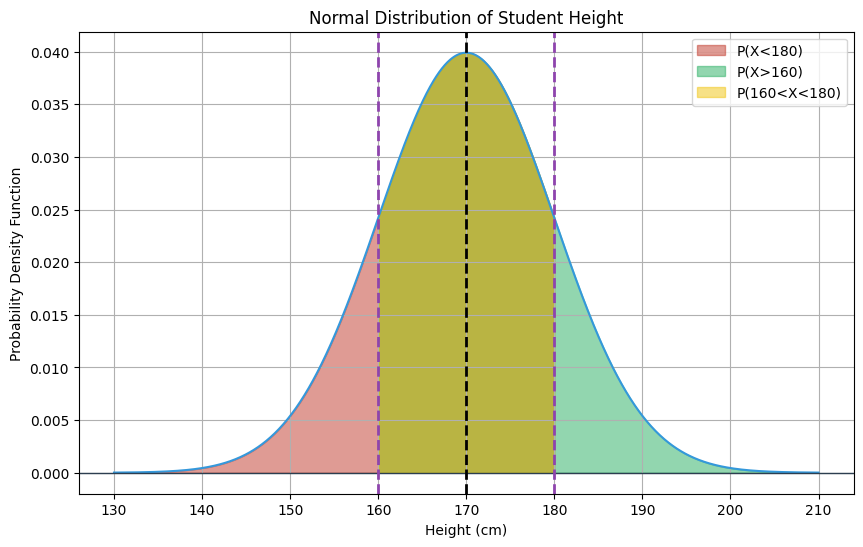

P(X<180) = 0.8413447460685429
P(X>160) = 0.8413447460685429
P(160<X<180) = 0.6826894921370859


In [12]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# given parameters
mean = 170       # mean
sigma = 10       # standard deviation

# height to calculate
x_values = np.linspace(mean - 4 * sigma, mean + 4 * sigma, 1000)

# compute normal distribution
pdf_values = st.norm.pdf(x_values, mean, sigma)

# declare colors with meaningful names
colors = {
    "bell_curve_color": "#3498db",  # Blue for the main curve
    "area_p_x_less_than_180": "#c0392b",  # Red for P(X<180)
    "area_p_x_greater_than_160": "#27ae60",  # Green for P(X>160)
    "area_p_160_less_than_x_less_than_180": "#f1c40f",  # Yellow for 160<X<180
    "scale_line_color": "#2c3e50",  # Dark gray for axis scale
    "mean_line_color": "#000000",  # Black for mean
    "one_std_dev_color": "#8e44ad"  # Purple for ±1 standard deviation
}

# plot bell curve
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, color=colors["bell_curve_color"])

# shade area for P(X<180)
px_180 = st.norm.cdf(180, mean, sigma)
plt.fill_between(x_values, pdf_values, where=(x_values <= 180),
                 color=colors["area_p_x_less_than_180"], alpha=0.5, label='P(X<180)')

# shade area for P(X>160)
px_160 = st.norm.cdf(160, mean, sigma)
plt.fill_between(x_values, pdf_values, where=(x_values >= 160),
                 color=colors["area_p_x_greater_than_160"], alpha=0.5, label='P(X>160)')

# shade area for P(160<X<180)
px_160_180 = st.norm.cdf(180, mean, sigma) - st.norm.cdf(160, mean, sigma)
plt.fill_between(x_values, pdf_values, where=(x_values > 160) & (x_values < 180),
                 color=colors["area_p_160_less_than_x_less_than_180"], alpha=0.5, label='P(160<X<180)')

# add labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density Function')
plt.title('Normal Distribution of Student Height')
plt.legend()

# adding scale and standard deviation lines
plt.axhline(0, color=colors["scale_line_color"], lw=1)
plt.axvline(mean - sigma, color=colors["one_std_dev_color"], lw=2, ls='dashed', label='1 Standard Deviation Below Mean')
plt.axvline(mean, color=colors["mean_line_color"], lw=2, ls='dashed', label='Mean')
plt.axvline(mean + sigma, color=colors["one_std_dev_color"], lw=2, ls='dashed', label='1 Standard Deviation Above Mean')

# show plot
plt.grid(True)
plt.show()

# print results
print("P(X<180) =", px_180)
print("P(X>160) =", 1 - px_160)
print("P(160<X<180) =", px_160_180)
